# Tutorial/Assignment 2:

In [1]:
from plotting import *

## Load the scipy and numpy packages

In [2]:
import scipy as sp
import scipy.integrate
import scipy.interpolate
import scipy.optimize
import scipy.special
import numpy as np

# Special functions

Calculate the values of the Chebyshev polynomial of the first kind at 51 points between -1 and 1. Try different values for the `n` parameter.

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

Note that there are two definitions for the Chebyshev polynomial of the first kind. One of them returns an array, the other returns a polynomial object. You will need the one that returns the array.

In [3]:
x = np.linspace(-1, 1, 51)
y = sp.special.eval_chebyt(3, x)

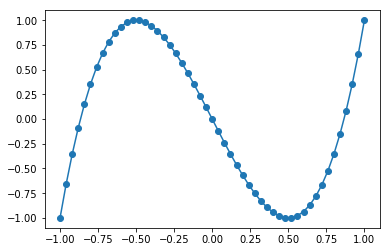

In [4]:
# If you used x and y as the variable names in the cell above 
# you can use the following plot command to display the results.
plot(x, y)

Write a loop that plots the five lowest order Chebyshev polynomials of the first kind using the plot command from above.

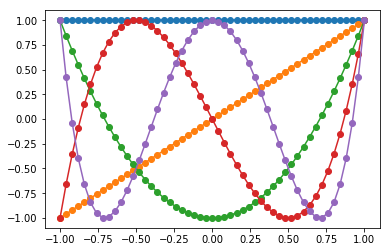

In [5]:
x = np.linspace(-1, 1, 51)
for n in range(5):
    y = sp.special.eval_chebyt(n, x)
    plot(x, y)

**Challenge**

Choose five special functions that take only one input parameter (and that exist over the same range) and plot them using a single for loop. You will need to use a list or a tuple to store the functions.

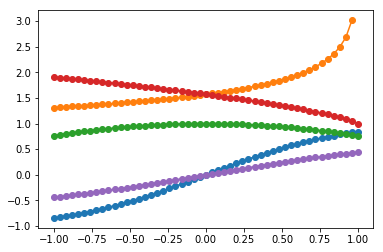

In [6]:
x = np.linspace(-1, 1, 51)
funcs = (sp.special.erf, sp.special.ellipk, sp.special.j0, sp.special.ellipe, sp.special.j1)

for func in funcs:
    y = func(x)
    plot(x, y)

## Interpolation of discrete data

Load the data from the `interpolation_data.csv` file. The data consists of two columns and does not have a header line.

In [7]:
x, y = np.genfromtxt('interpolation_data.csv', delimiter=',', unpack=True)
x, y

(array([ 0.65345455,  1.37327184,  2.49130091,  3.6118326 ,  4.04115026,
         5.57267814,  6.99796343,  7.25301126,  8.69489173,  9.15536847,
        10.18939476, 11.10229027, 12.21381013, 13.08446057, 14.56197103]),
 array([ 0.6079329 ,  0.98055538,  0.60541863, -0.4531002 , -0.78305184,
        -0.65221831,  0.65544986,  0.82478731,  0.66678485,  0.26616228,
        -0.69226052, -0.99431125, -0.34530193,  0.49522166,  0.91111949]))

Plot the data

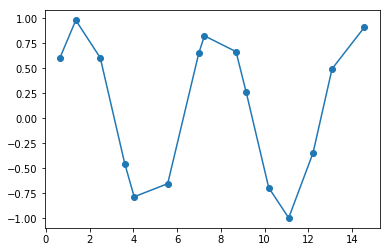

In [8]:
plot(x, y)

Create a cubic spline interpolation, evaluate it at 50 points, and plot this on top of the data.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

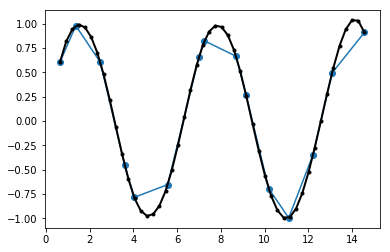

In [9]:
interp = sp.interpolate.interp1d(x, y, kind='cubic')
xs = np.linspace(min(x), max(x), 50)

plot(x, y)
plot_interp(xs, interp(xs))

## Root finding

Find the first root of the function (near `x=3`) with the help of the Newton-Rhapson method.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton

In [10]:
sp.optimize.newton(interp, x0=2.5)

3.1457945213561342

Do the same thing with the `root` function. You will need to change the interpolation function so that it does not cause an error when the root finder tries points outside the domain of the function. Look for the `bounds_error` and `fill_value` parameters in https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

In [11]:
interp = sp.interpolate.interp1d(x, y, kind='cubic', bounds_error=False, fill_value='extrapolate')

sp.optimize.root(interp, x0=2.5)

    fjac: array([[-1.]])
     fun: array([-9.71445147e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-9.73514436e-10])
       r: array([1.00474001])
  status: 1
 success: True
       x: array([3.14579452])

Use a for loop to try different interpolation schemes to see what values you get from the `newton` routine. The interpolation types are found at:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

Use the `plot_root(x, y, root)` function from the plotting helper module to display each plot in the for loop. Note how some of the roots will fail to converge properly. Why is this? Think of how the Newton-Rhapson method works.

https://en.wikipedia.org/wiki/Newton%27s_method

linear : 3.132187724643383


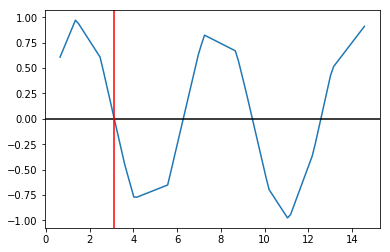





nearest : 2.500175


/home/nicholas/.local/lib/python3.6/site-packages/scipy/optimize/zeros.py:324: RuntimeWarning: Tolerance of 0.0003500000000000725 reached
  warnings.warn(msg, RuntimeWarning)


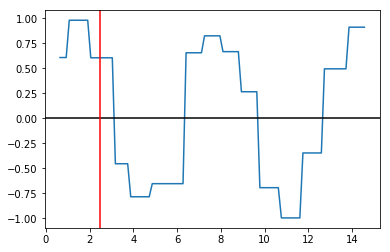





zero : 2.500175


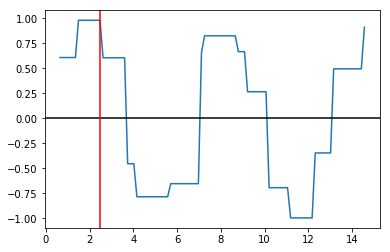





slinear : 3.132187724643383


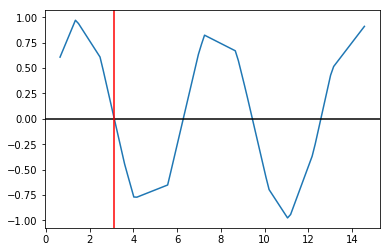





quadratic : 3.1419842237139526


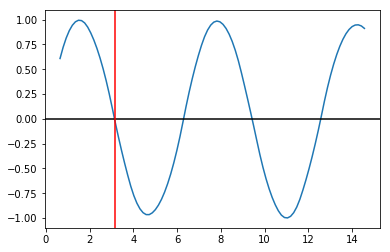





cubic : 3.1457945213561342


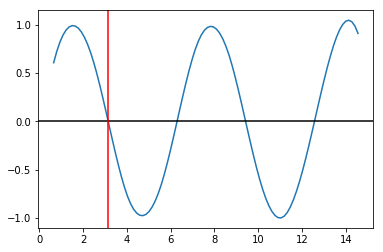





previous : 2.500175


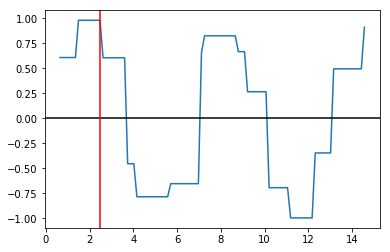





next : 2.500175


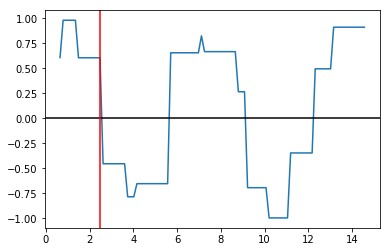

In [12]:
kinds = ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next')
for kind in kinds:
    interp = sp.interpolate.interp1d(x, y, kind=kind)
    root = sp.optimize.newton(interp, x0=2.5)
    print(kind, ':', root)
    xs = np.linspace(min(x), max(x), 100)
    plot_root(xs, interp(xs), root)
    print('\n\n\n')

Find the points at which these two functions intersect:

$$y = x^2 + \cos(x)$$
$$y = x - \tan^{-1}(x) + 1.2$$

You can solve this with the `root` function, the `newton` function, or with fsolve:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html?highlight=fsolve#scipy.optimize.fsolve

First plot the two functions between $x=-1$ and $x=1$.

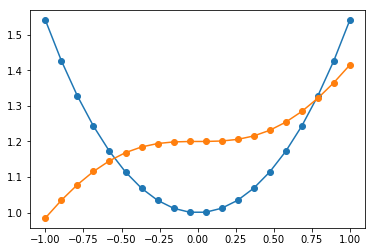

In [13]:
x = np.linspace(-1, 1, 20)
plot(x, x**2 + np.cos(x))
plot(x, x - np.arctan(x) + 1.2)

In [14]:
# Note how there are two intersections so we need to run the root finder 
# with different starting values to find the two points

Now find the two intersection points.

In [15]:
sp.optimize.fsolve(lambda x: x**2 + np.sin(x) - x + np.arctan(x) - 1.2, x0=-0.5)

array([-1.32945797])

In [16]:
sp.optimize.root(lambda x: x**2 + np.sin(x) - x + np.arctan(x) - 1.2, x0=0.4)

    fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.18793864e-13])
       r: array([-1.89480708])
  status: 1
 success: True
       x: array([0.78311253])

In [17]:
sp.optimize.newton(lambda x: x**2 + np.sin(x) - x + np.arctan(x) - 1.2, x0=0.4)

0.7831125301192254

## Minimization

Use the SciPy minimize function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

to find the minimum of

$$f(x) = -2\exp(-(x - 3)^2) - 3\exp(-(x + 2)^2)$$

You might want to use a lambda function in the minimizer.

First plot the function between -5 and 5.

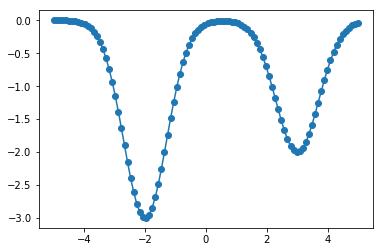

In [18]:
xs = np.linspace(-5, 5, 100)
plot(xs, -2*np.exp(-(xs - 3)**2) - 3*np.exp(-(xs + 2)**2))

Find the minimum.

In [19]:
results = sp.optimize.minimize(lambda x: -2*np.exp(-(x - 3)**2) - 3*np.exp(-(x + 2)**2), x0=-1)
results

      fun: -3.0000000000268394
 hess_inv: array([[0.4454699]])
      jac: array([-3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-2.00000056])

Use a different starting point to find the other local minimum.

In [20]:
results = sp.optimize.minimize(lambda x: -2*np.exp(-(x - 3)**2) - 3*np.exp(-(x + 2)**2), x0=1)
results

      fun: -2.000000000041664
 hess_inv: array([[0.25000389]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 3
     njev: 10
   status: 0
  success: True
        x: array([3.])

## Integration

Integrate the normal distribution with mean 0 and standard deviation 1 from $-\infty$ to 3.

In [21]:
sp.integrate.quad(lambda x: 1/(2*np.pi)**0.5*np.exp(-(x)**2/2), -np.inf, 3)

(0.9986501019683699, 1.9508541003084228e-10)

Write a function that takes a three parameters and returns the value of the normal distribution with mean mu and standard deviation sigma.

`norm(x, mu, sigma)`

In [22]:
def norm(x, mu, sigma):
    return 1/((2*np.pi)**0.5*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

Integrate this function between -3 and 3. Use the `args` keyword to pass the a mean and standard deviation of your choice. A good test would be to set mu=0 and sigma=1 to get a known value for the integral using the error function.

In [23]:
print(sp.integrate.quad(norm, -3, 3, args=(0, 1)))
print(sp.special.erf(3/np.sqrt(2)))

(0.9973002039367399, 1.1072256503105314e-14)
0.9973002039367398


Try different values for $\mu$ and $\sigma$.

In [24]:
sp.integrate.quad(norm, -3, 3, args=(2, 4))

(0.49305655201606846, 5.4740273649053036e-15)

## Solving an ODE

Plot following equation using the IVP solver:

$$f'(x) + y = x$$

$$f(0) = 1$$

We want to integrate up to $x=3$.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

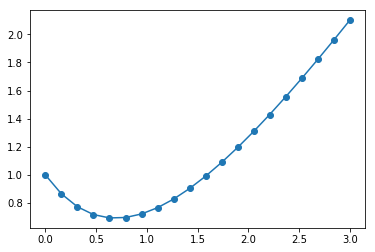

In [25]:
def dy_dx(x, y):
    return x - y

xs = np.linspace(0, 3, 20)
res = sp.integrate.solve_ivp(dy_dx, [0, 3], y0=[1], t_eval=xs)
plot(xs, res.y[0])

## Solving a second order ODE

Plot the following equation from $x=-1$ to $x=10$ using the IVP solver:

$$y''+y'+4y=0$$

$$y(-1) = 1$$
$$y'(-1) = -1$$

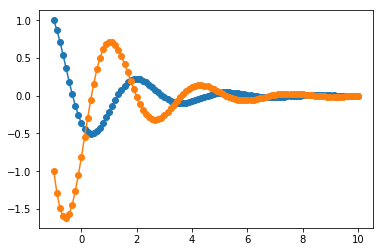

In [26]:
# First split it into two equations:
#
# Let x2 = y' and x1 = y
# Then
# x2' = -2*x2 - exp(x1)
# x1' = x2
def func(x, y):
    x1 = y[0]
    x2 = y[1]
    return (x2, -x2 - 4*x1)

xs = np.linspace(-1, 10, 100)
res = sp.integrate.solve_ivp(func, [-1, 10], y0=[1, -1], t_eval=xs)
plot(xs, res.y[0])
plot(xs, res.y[1])

Change the number of t_eval points to a small number. Does this change the accuracy of the results? Why or why not?

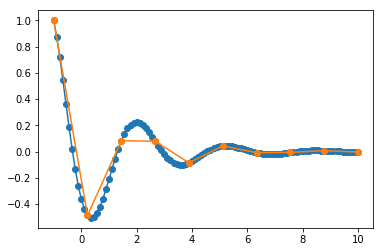

In [27]:
# First split it into two equations:
#
# Let x2 = y' and x1 = y
# Then
# x2' = -2*x2 - exp(x1)
# x1' = x2
def func(x, y):
    x1 = y[0]
    x2 = y[1]
    return (x2, -x2 - 4*x1)

xs = np.linspace(-1, 10, 100)
res = sp.integrate.solve_ivp(func, [-1, 10], y0=[1, -1], t_eval=xs)
plot(xs, res.y[0])

xs = np.linspace(-1, 10, 10)
res = sp.integrate.solve_ivp(func, [-1, 10], y0=[1, -1], t_eval=xs)
plot(xs, res.y[0])

In [28]:
# The integration is just as accurate as before, but the plot looks bad. 
# t_eval is just the set of points at which the results are evaluated, and does not
# affect the numerical integration.